In [1]:
import subprocess
import os
import sys
import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Custom functions
sys.path.insert(1, '../..')
from utils import *

# scperturb package
sys.path.insert(1, '../../../package/src/')
from scperturb import *

%matplotlib inline

# Uhlitz et al. (+ new samples)

In [19]:
adata = sc.read("/fast/work/users/peidlis_c/data/NB013_singlecell_CRC_patients/scrnaseq/NB013_singlecell_CRC_patients_preprocessed_annotated.h5")

In [20]:
adata

AnnData object with n_obs × n_vars = 142608 × 33538
    obs: 'patient', 'condition', 'sample', 'organoid', 'topography_ICDO3', 'TNM_stage', 'TNM_grade', 'FFPE', 'diagnosis', 'MS_status', 'cna_clone', 'cna_score', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'percent_hemo', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'louvain', 'louvain_highres', 'epi_score', 'str_score', 'imm_score', 'celltype_1a', 'celltype_1a_score', 'celltype_1b', 'celltype_2'
    var: 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltype_1a_colors', 'celltype_1b_colors', 'celltype_2_colors', 'condition_colors', 'diffmap_evals', 'hvg', 'louvain', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'sample_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

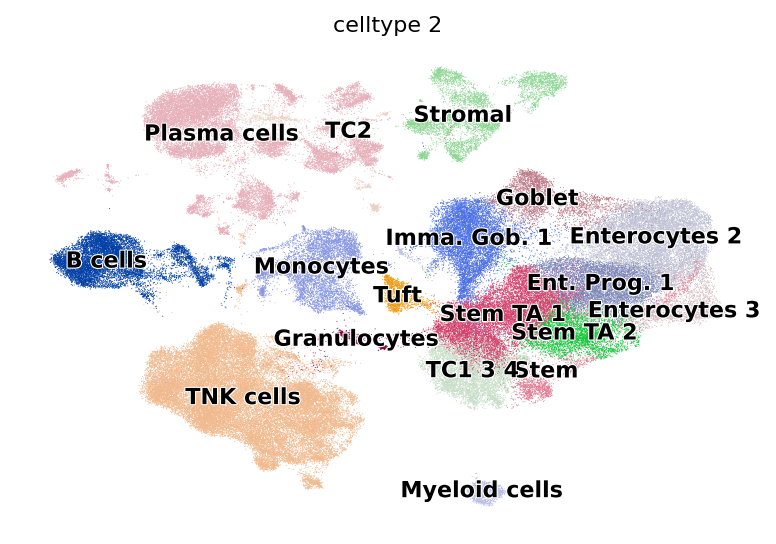

In [21]:
scv.pl.scatter(adata, color='celltype_2', dpi=160)

In [22]:
sdata = sc.pp.subsample(adata, fraction=0.1, copy=True)

In [23]:
ed = edist(sdata, 'celltype_2')

100%|██████████| 18/18 [00:05<00:00,  3.01it/s]


In [24]:
ed = cluster_matrix(ed, 'both')

In [25]:
pl.show()

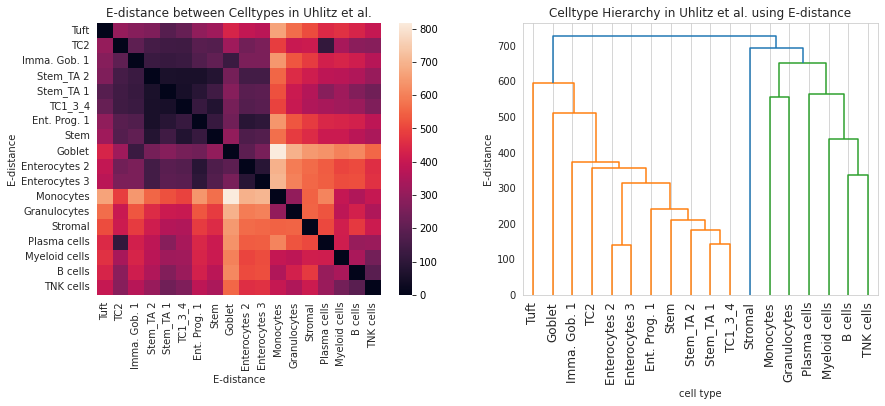

In [26]:
from scipy.cluster import hierarchy
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 2, figsize=[7*2,5])

ax = axs[0]
sns.heatmap(ed, ax=ax)
ax.set_title('E-distance between Celltypes in Uhlitz et al.')
ax.set_xlabel('E-distance')
ax.set_ylabel('E-distance')

ax=axs[1]
Z = hierarchy.linkage(ed, 'single')
dn = hierarchy.dendrogram(Z, labels=ed.columns, color_threshold=670, ax=ax)
pl.xticks(rotation=90)
pl.grid(axis='y')
pl.ylabel('E-distance')
pl.xlabel('cell type')
pl.title('Celltype Hierarchy in Uhlitz et al. using E-distance')
pl.show()

In [27]:
ed

,Tuft,TC2,Imma. Gob. 1,Stem_TA 2,Stem_TA 1,TC1_3_4,Ent. Prog. 1,Stem,Goblet,Enterocytes 2,Enterocytes 3,Monocytes,Granulocytes,Stromal,Plasma cells,Myeloid cells,B cells,TNK cells
Tuft,0.000000,305.474520,276.313274,263.936539,184.755286,216.251129,295.518598,322.137330,434.599654,390.494726,373.142664,664.351344,565.410409,513.366106,448.286661,462.838179,436.156800,398.172822
TC2,305.474520,0.000000,197.888593,147.502153,138.798581,136.830070,185.623105,180.045726,323.221361,237.582712,255.587691,486.486400,402.713638,410.722214,111.188146,340.708768,285.530099,278.801391
Imma. Gob. 1,276.313274,197.888593,0.000000,127.272574,119.330468,125.507541,173.091146,205.763726,127.167373,255.385731,256.725847,643.403415,526.948734,481.974238,421.007528,434.904403,415.970820,368.345919
Stem_TA 2,263.936539,147.502153,127.272574,0.000000,57.563708,55.042189,55.997695,78.563455,243.784136,145.329715,144.021367,552.222261,451.307635,416.391619,381.125458,375.260799,355.424824,312.121807
Stem_TA 1,184.755286,138.798581,119.330468,57.563708,0.000000,54.139520,88.571967,138.874489,275.367937,191.298514,195.796408,519.424745,405.910557,362.302504,280.284581,324.958850,269.574842,233.520694
TC1_3_4,216.251129,136.830070,125.507541,55.042189,54.139520,0.000000,120.304873,73.539154,247.885887,178.642328,188.328345,494.505464,400.642032,354.398114,340.173324,325.498147,313.452052,264.460772
Ent. Prog. 1,295.518598,185.623105,173.091146,55.997695,88.571967,120.304873,0.000000,118.115595,235.327829,86.866376,100.882052,638.849539,527.325207,484.675648,443.048637,436.759497,427.042641,380.276296
Stem,322.137330,180.045726,205.763726,78.563455,138.874489,73.539154,118.115595,0.000000,296.795957,166.265225,177.586339,568.328572,484.397787,451.835994,408.112474,406.159407,376.207684,346.499082
Goblet,434.599654,323.221361,127.167373,243.784136,275.367937,247.885887,235.327829,296.795957,0.000000,197.519488,248.792284,816.382605,694.039450,646.736677,633.196330,600.961053,612.335933,558.063766
Enterocytes 2,390.494726,237.582712,255.385731,145.329715,191.298514,178.642328,86.866376,166.265225,197.519488,0.000000,89.138291,694.281657,592.183879,561.887777,538.765523,499.919033,507.974377,457.455279


# 10x data

In [30]:
adata = sc.datasets.pbmc3k_processed()

In [7]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pp.pca(adata)
ed = edist(adata, 'louvain')

100%|██████████| 8/8 [00:00<00:00, 32.78it/s]


In [8]:
ed

,CD4 T cells,B cells,CD14+ Monocytes,NK cells,CD8 T cells,FCGR3A+ Monocytes,Dendritic cells,Megakaryocytes
CD4 T cells,0.000000,251.430885,373.364552,491.822643,90.247257,287.569564,379.185208,4757.996448
B cells,251.430885,0.000000,489.038638,734.163137,340.666707,381.928806,356.664906,4926.125416
CD14+ Monocytes,373.364552,489.038638,0.000000,731.435252,445.785942,143.314733,364.070918,4702.873720
NK cells,491.822643,734.163137,731.435252,0.000000,279.016796,582.455379,690.210811,5176.196671
CD8 T cells,90.247257,340.666707,445.785942,279.016796,0.000000,337.246635,414.685519,4819.479231
FCGR3A+ Monocytes,287.569564,381.928806,143.314733,582.455379,337.246635,0.000000,473.013972,4625.588895
Dendritic cells,379.185208,356.664906,364.070918,690.210811,414.685519,473.013972,0.000000,4718.059173
Megakaryocytes,4757.996448,4926.125416,4702.873720,5176.196671,4819.479231,4625.588895,4718.059173,0.000000
